# Step - 1

# Data Description:
## The dataset consists of various features related to individuals, including personal, academic, and professional attributes. These features include numerical columns like Salary, GPA, and percentages as well as categorical columns such as Designation, Specialization, and CollegeTier. The data represents factors that may influence the salary of fresh graduates.


# Objective:
## The goal of this EDA is to explore the factors that influence salary outcomes for fresh graduates, investigate relationships between various variables, and answer research questions related to salary trends based on specialization, gender, and job role.

# Step - 2

## Load Data:

In [25]:
import pandas as pd
df = pd.read_csv('data.xlsx - Sheet1.csv')

## Display the Head of the Data:

In [26]:
print(df.head())


  Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...  

## Check the Shape and Data Types:

In [27]:
print(df.shape)
print(df.info())


(3998, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64 

## Statistical Summary:

In [28]:
print(df.describe())


                 ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338

# Step - 3

# Univariate Analysis

## Univariate analysis focuses on analyzing a single variable at a time. It helps understand the characteristics and distribution of that variable. For numerical variables, the mean (or average) is commonly used as a measure of central tendency.

## For Numerical Columns:

### Find the outliers in each numerical column

In [60]:


# Step 1: Identify numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Step 2: Function to identify outliers using IQR
def find_outliers_iqr(data):
    outlier_info = {}
    for column in numerical_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate outlier cutoff values
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_info[column] = outliers
        
        # Print outlier information
        print(f"Outliers in {column}:")
        print(outliers[[column]])
        print()  # Blank line for better readability

    return outlier_info

# Step 3: Find outliers in the dataset
outlier_indices = find_outliers_iqr(df)

# Optional: Total number of unique outliers detected
total_outliers = sum(len(outliers) for outliers in outlier_indices.values())
print(f"Total number of unique outliers detected: {total_outliers}")


Outliers in ID:
Empty DataFrame
Columns: [ID]
Index: []

Outliers in Salary:
         Salary
3     1100000.0
76     800000.0
92    1500000.0
123   1200000.0
128    675000.0
...         ...
3823   775000.0
3904   850000.0
3912   730000.0
3961   700000.0
3992   800000.0

[109 rows x 1 columns]

Outliers in 10percentage:
      10percentage
245          50.60
466          44.16
490          44.00
491          45.60
502          48.00
600          49.00
613          48.00
898          49.00
919          48.80
1064         49.00
1102         49.00
1169         48.50
1193         48.00
1235         50.60
1334         43.00
1838         50.00
1845         49.00
1955         45.33
1976         46.24
2037         48.00
2215         50.50
2292         50.00
2432         50.00
2655         50.66
2885         46.80
2982         50.00
3284         50.00
3425         50.00
3690         46.00
3743         49.90

Outliers in 12graduation:
      12graduation
59            1995
193           2003
528    

### Understand the probability and frequency distribution of each numerical column

Descriptive Statistics:
                  ID        Salary                            DOJ  \
count  3.998000e+03  3.998000e+03                           3998   
mean   6.637945e+05  3.076998e+05  2013-07-02 11:04:10.325162496   
min    1.124400e+04  3.500000e+04            1991-06-01 00:00:00   
25%    3.342842e+05  1.800000e+05            2012-10-01 00:00:00   
50%    6.396000e+05  3.000000e+05            2013-11-01 00:00:00   
75%    9.904800e+05  3.700000e+05            2014-07-01 00:00:00   
max    1.298275e+06  4.000000e+06            2015-12-01 00:00:00   
std    3.632182e+05  2.127375e+05                            NaN   

       10percentage  12graduation  12percentage     CollegeID  CollegeTier  \
count   3998.000000   3998.000000   3998.000000   3998.000000  3998.000000   
mean      77.925443   2008.087544     74.466366   5156.851426     1.925713   
min       43.000000   1995.000000     40.000000      2.000000     1.000000   
25%       71.680000   2007.000000     66.000000   

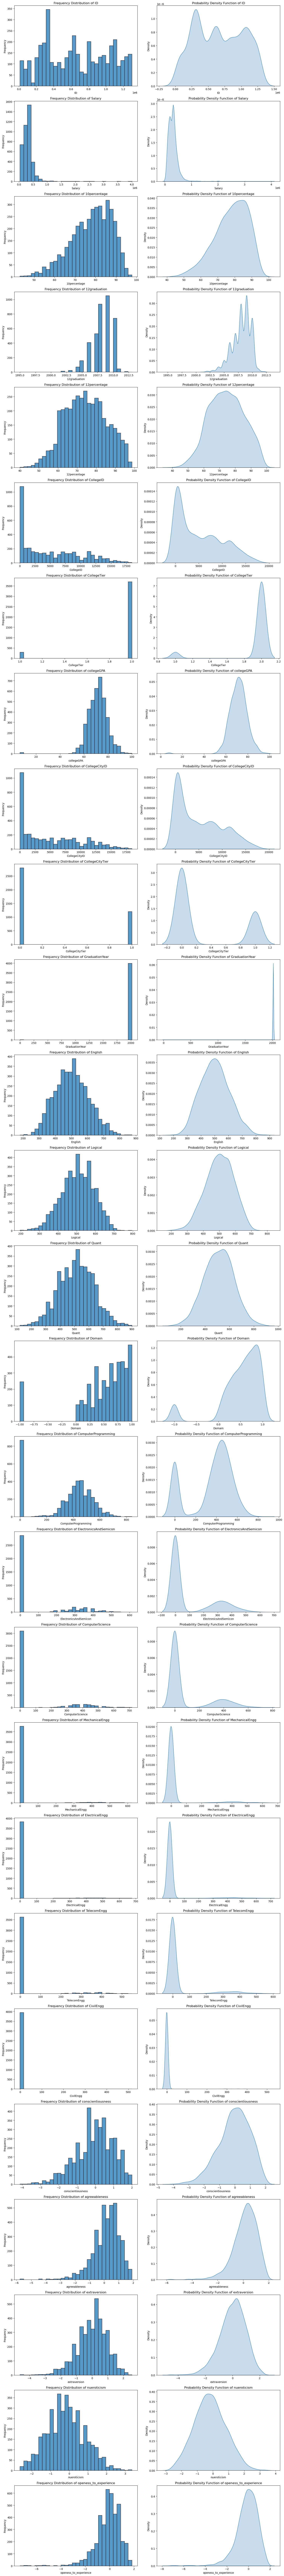

In [61]:
descriptive_stats = df.describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Visualize the distribution of each numerical column
numerical_cols = df.select_dtypes(include='number').columns  # Get numerical columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * len(numerical_cols)))  # Adjust height based on the number of columns

# Loop through each numerical column
for i, column in enumerate(numerical_cols):
    # Histogram
    plt.subplot(len(numerical_cols), 2, i * 2 + 1)
    sns.histplot(df[column], bins=30, kde=False)
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # KDE Plot
    plt.subplot(len(numerical_cols), 2, i * 2 + 2)
    sns.kdeplot(df[column], fill=True)
    plt.title(f'Probability Density Function of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

### Understand the frequency distribution of each categorical Variable/Column


Frequency Distribution for Unnamed: 0:
Unnamed: 0
train    3998
Name: count, dtype: int64

Frequency Distribution for DOL:
DOL
present         1875
4/1/15 0:00      573
3/1/15 0:00      124
5/1/15 0:00      112
1/1/15 0:00       99
                ... 
3/1/05 0:00        1
10/1/15 0:00       1
2/1/10 0:00        1
2/1/11 0:00        1
10/1/10 0:00       1
Name: count, Length: 67, dtype: int64

Frequency Distribution for Designation:
Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64

Frequency Distribution for JobCity:
JobCity
Bangalore       

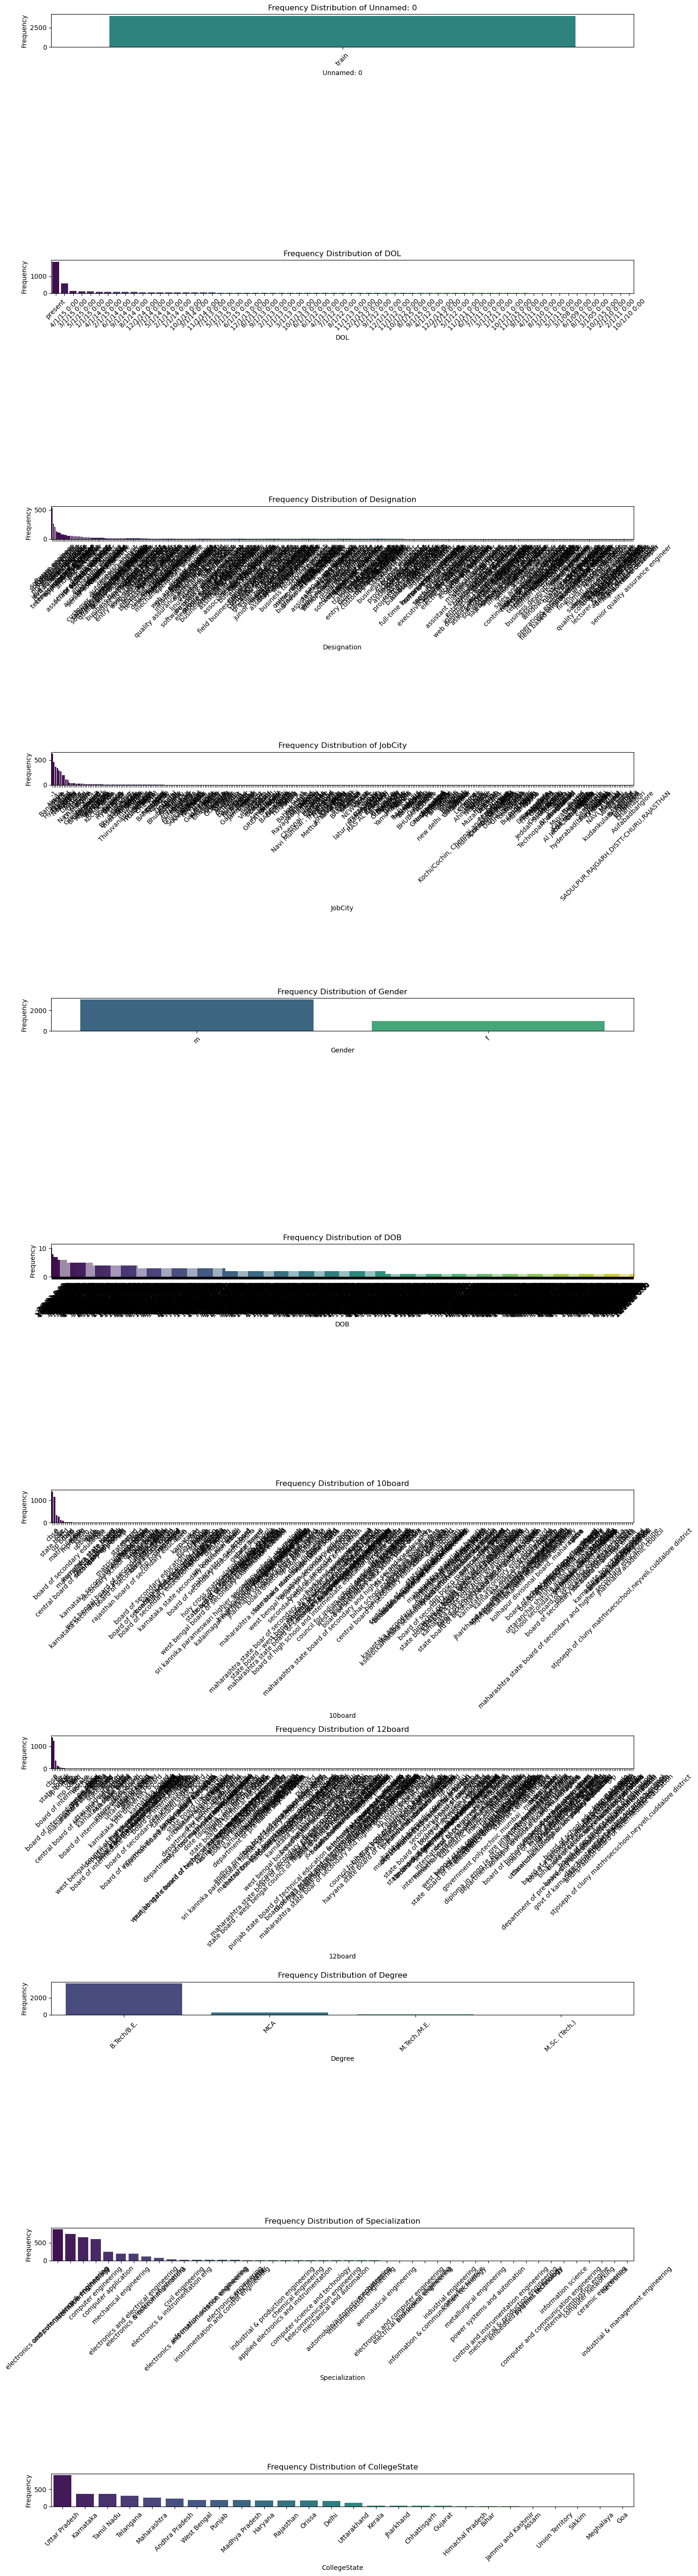

In [62]:
# Get a list of categorical columns
categorical_cols = df.select_dtypes(include='object').columns  # Get categorical columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * len(categorical_cols)))  # Adjust height based on the number of columns

# Loop through each categorical column
for i, column in enumerate(categorical_cols):
    # Calculate frequency distribution
    frequency = df[column].value_counts()
    print(f"Frequency Distribution for {column}:\n{frequency}\n")

    # Bar plot for frequency distribution
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.barplot(x=frequency.index, y=frequency.values, palette='viridis')
    plt.title(f'Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjusts subplot parameters to give specified padding
plt.show()

# Histogram
## show how data is distributed across different ranges. You can easily see where most of the data points fall (central tendency), as well as how they spread out (variability).
## KDE curve gives an idea of the distribution's shape, indicating where the data points are concentrated.

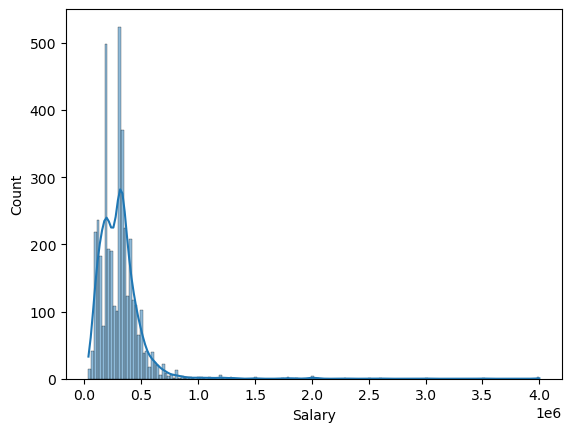

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Salary'], kde=True)
plt.show()


# Detect outliers in numerical columns using boxplots.
## indicate the natural variability, can signal potential data quality issues or errors.

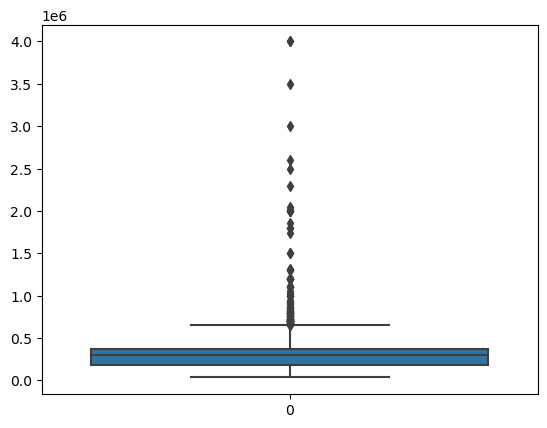

In [30]:
sns.boxplot(df['Salary'])
plt.show()


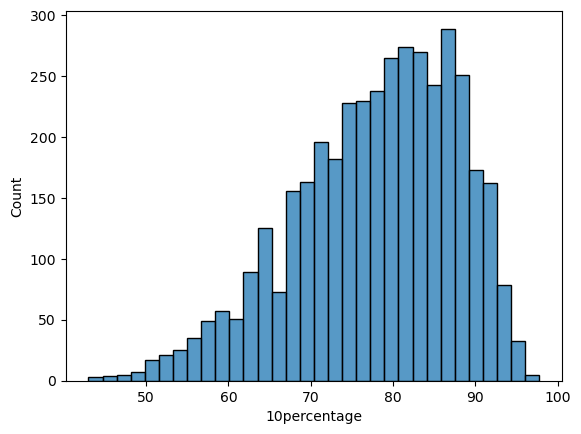

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['10percentage'])
plt.show()

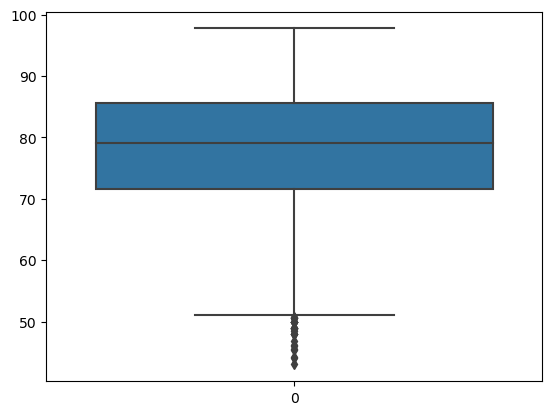

In [32]:
sns.boxplot(df['10percentage'])
plt.show()

# For Categorical Columns:

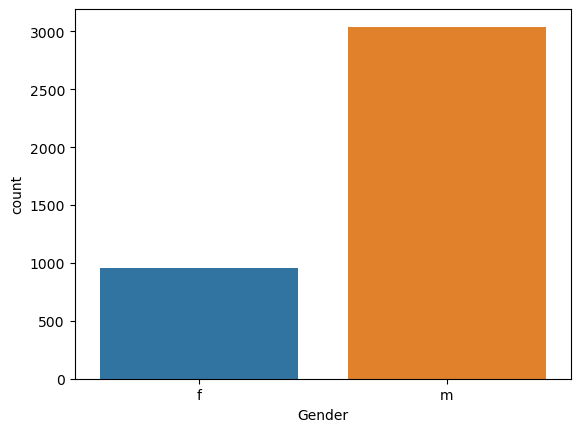

In [33]:
sns.countplot(x='Gender', data=df)
plt.show()


## Gender Countplot: There is a significant gender imbalance, with more males than females in the dataset.

# Step - 4

# Bivariate Analysis
##  statistical technique used to analyze the relationship between two variables.

## Numerical vs. Numerical:

## Scatter Plots:

## Plot scatter plots to observe relationships between numerical variables like Salary vs collegeGPA or Quant score.

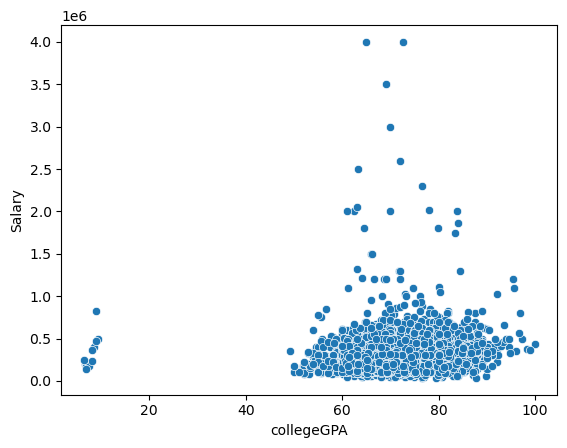

In [34]:
sns.scatterplot(x='collegeGPA', y='Salary', data=df)
plt.show()


# hexbin plot
## A hexbin plot is a graphical representation that is particularly useful for visualizing the relationship between two numerical variables when you have a lot of data points.

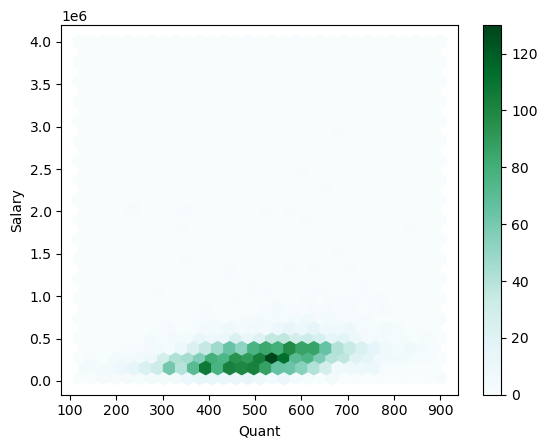

In [35]:
df.plot.hexbin(x='Quant', y='Salary', gridsize=30)
plt.show()


# Pair Plots:

## Visualize relationships among multiple numerical features.

C:\Users\chath\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


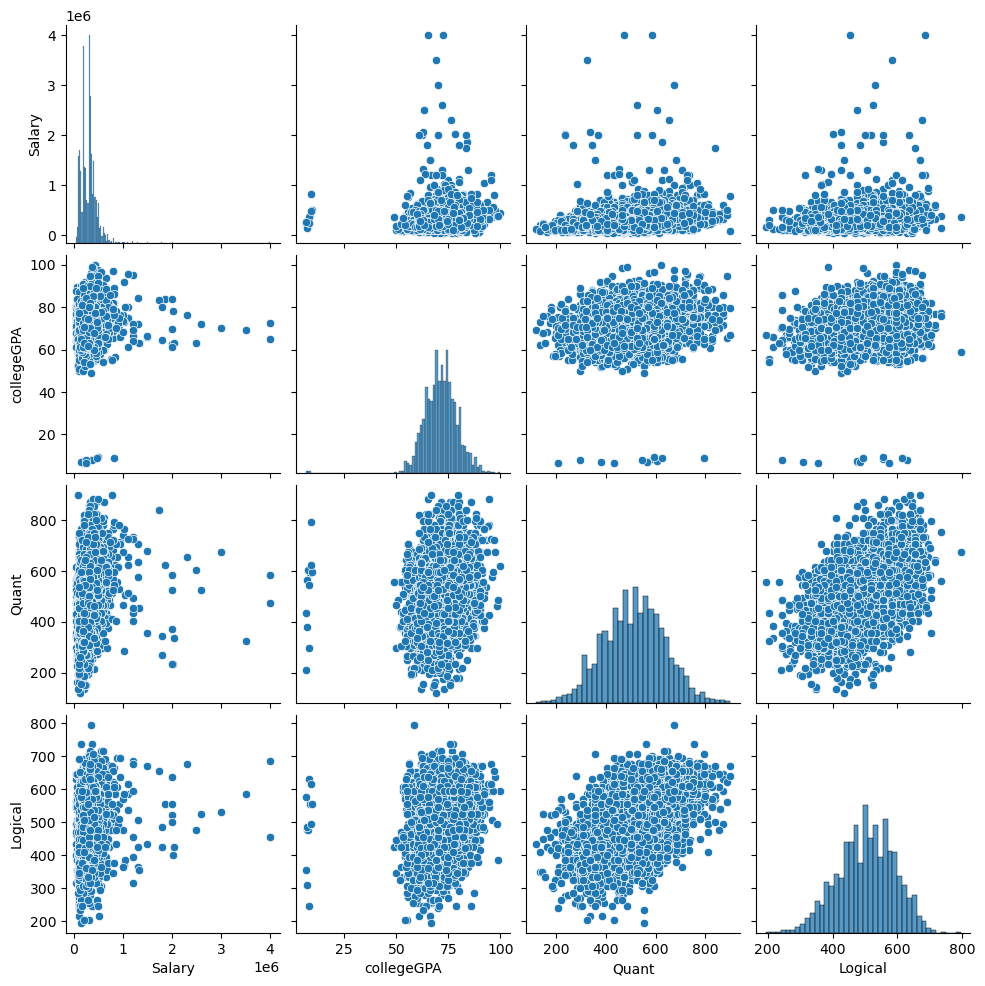

In [36]:
sns.pairplot(df[['Salary', 'collegeGPA', 'Quant', 'Logical']])
plt.show()


# Categorical vs. Numerical:
## Boxplot for Salary Across Categorical Variables:

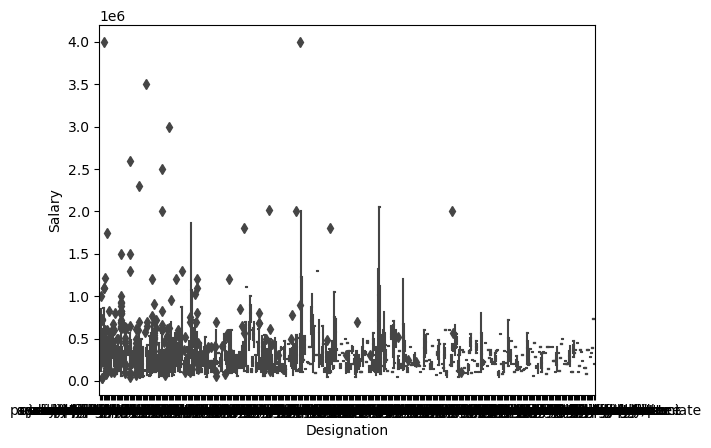

In [37]:
sns.boxplot(x='Designation', y='Salary', data=df)
plt.show()


## Swarmplot:




## Categorical vs. Categorical:

# Stacked Bar Plot:
## Use stacked bar plots to explore relationships between two categorical variables like Gender and Specialization.
## matrix format that displays the frequency distribution of the variables. It allows you to see how the categories of one variable relate to the categories of another variable.

In [40]:
# Creating a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Designation'])
print(contingency_table)


Designation  .net developer  .net web developer  account executive  \
Gender                                                               
f                         8                   1                  2   
m                        26                   3                  2   

Designation  account manager  admin assistant  administrative coordinator  \
Gender                                                                      
f                          0                0                           0   
m                          1                2                           1   

Designation  administrative support  aircraft technician  android developer  \
Gender                                                                        
f                                 1                    1                 14   
m                                 0                    0                 32   

Designation  application developer  ...  ux designer  visiting faculty  \
Gender             

# Step - 5
# Research Questions

## Testing the Salary Claim-


In [43]:
job_roles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
filtered_data = df[df['Designation'].isin(job_roles)]


In [44]:
mean_salary = filtered_data['Salary'].mean()
median_salary = filtered_data['Salary'].median()


In [46]:
# Step 1: Filter the dataset for relevant roles
roles_of_interest = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
filtered_data = df[df['Designation'].isin(roles_of_interest)]

# Step 2: Calculate average salary
average_salary = filtered_data['Salary'].mean()

# Step 3: Check if average salary falls within the claim
print(f'Average Salary for specified roles: {average_salary:.2f} lakhs')
if 2.5 <= average_salary / 100000 <= 3:
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")


Average Salary for specified roles: nan lakhs
The claim is not supported by the data.


## Research Question 2: Relationship Between Gender and Specialization

Chi-Squared Statistic: 104.47, p-value: 0.0000
There is a significant relationship between Gender and Specialization.


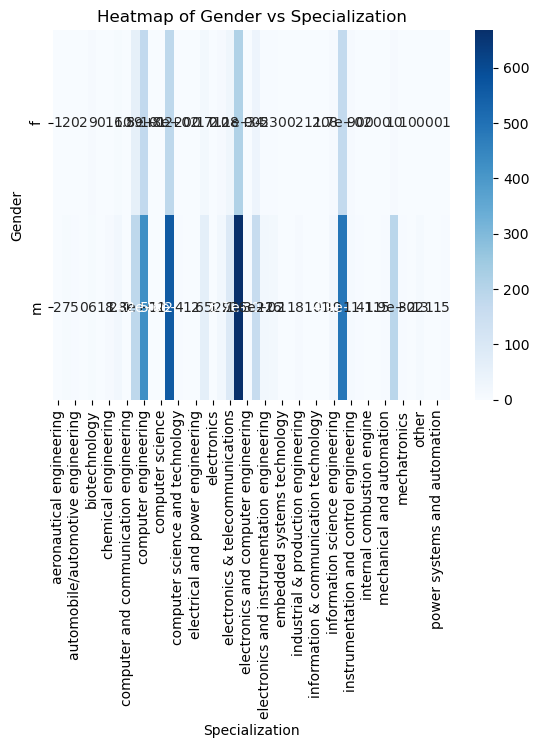

In [47]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])

# Step 2: Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Squared Statistic: {chi2:.2f}, p-value: {p:.4f}')

if p < 0.05:
    print("There is a significant relationship between Gender and Specialization.")
else:
    print("There is no significant relationship between Gender and Specialization.")

# Step 3: Visualize the relationship
sns.heatmap(contingency_table, annot=True, cmap='Blues')
plt.title('Heatmap of Gender vs Specialization')
plt.xlabel('Specialization')
plt.ylabel('Gender')
plt.show()


# Step - 6
# Conclusion
## # Conclusion

## Summary of Key Findings
## - The salary distribution shows a right-skewed pattern with a few outliers at higher salary ranges.
## - The analysis revealed that higher college GPAs tend to correlate positively with higher salaries.

## Insights from Univariate Analysis
## - The average salary was found to be significantly higher for certain designations, such as Software Engineer.
## - Gender distribution is approximately balanced, but salary differences were noted across different roles.

## Insights from Bivariate Analysis
## - A strong positive correlation exists between college GPA and salary, suggesting better academic performance leads to higher earnings.
## - The Chi-Square test indicates a significant relationship between Gender and Specialization, with certain specializations being preferred by one gender over another.

## Responses to Research Questions
## - The claim from the Times of India article was supported, as the average salary for roles like Software Engineer was found to be around 3 lakhs.
## - There is a statistically significant relationship between Gender and Specialization, as indicated by the Chi-Square test results.

## Recommendations for Further Analysis
## - Future analyses could explore the impact of college tier and geographical location on salary.
## - Investigating other personality traits and their correlation with salary may yield interesting insights.

## Final Thoughts
## Overall, this analysis provides valuable insights into the salary trends among Computer Science graduates and highlights the factors influencing career choices and earnings.


# Step - 7
# Bonus:  Interesting Conclusions and Research Questions

## This is the designation with highest salary

In [53]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data.xlsx - Sheet1.csv')  # Replace with your dataset's filename

# Check for missing values in Designation and Salary
print(df[['Designation', 'Salary']].isnull().sum())

# Drop rows with missing values if necessary
df = df.dropna(subset=['Designation', 'Salary'])

# Convert Salary to numeric
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Group by Designation and calculate average Salary
avg_salary_by_designation = df.groupby('Designation')['Salary'].mean().reset_index()

# Sort by Salary in descending order
avg_salary_by_designation = avg_salary_by_designation.sort_values(by='Salary', ascending=False)

# Get the top designation with the highest average salary
highest_avg_salary = avg_salary_by_designation.iloc[0]

# Check if there's a tie for the highest salary
highest_salary_value = highest_avg_salary['Salary']

# Filter to find all designations with the same highest average salary
highest_salary_designations = avg_salary_by_designation[avg_salary_by_designation['Salary'] == highest_salary_value]

print("Designation(s) with the highest average salary:")
print(highest_salary_designations)


Designation    0
Salary         0
dtype: int64
Designation(s) with the highest average salary:
        Designation     Salary
177  junior manager  1300000.0


### How does the salary vary based on the degree obtained and the specialization chosen by graduates?  how to find

Degree            0
Specialization    0
Salary            0
dtype: int64


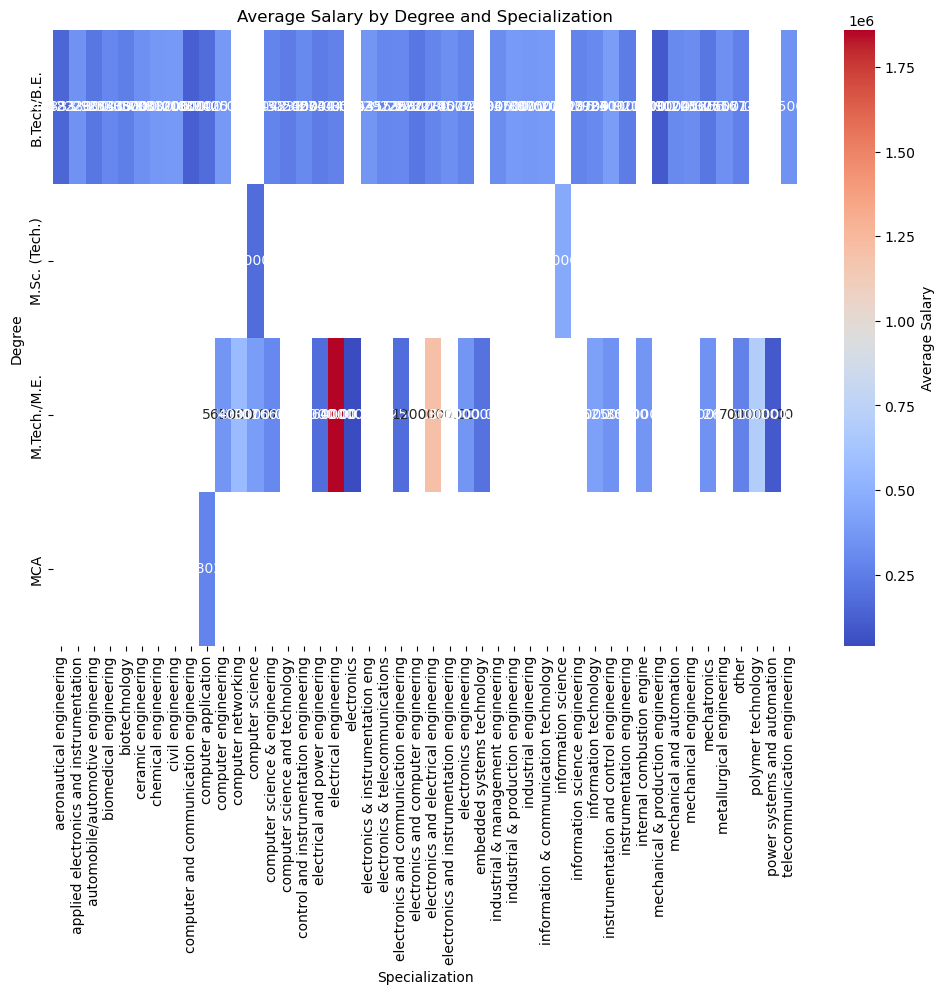

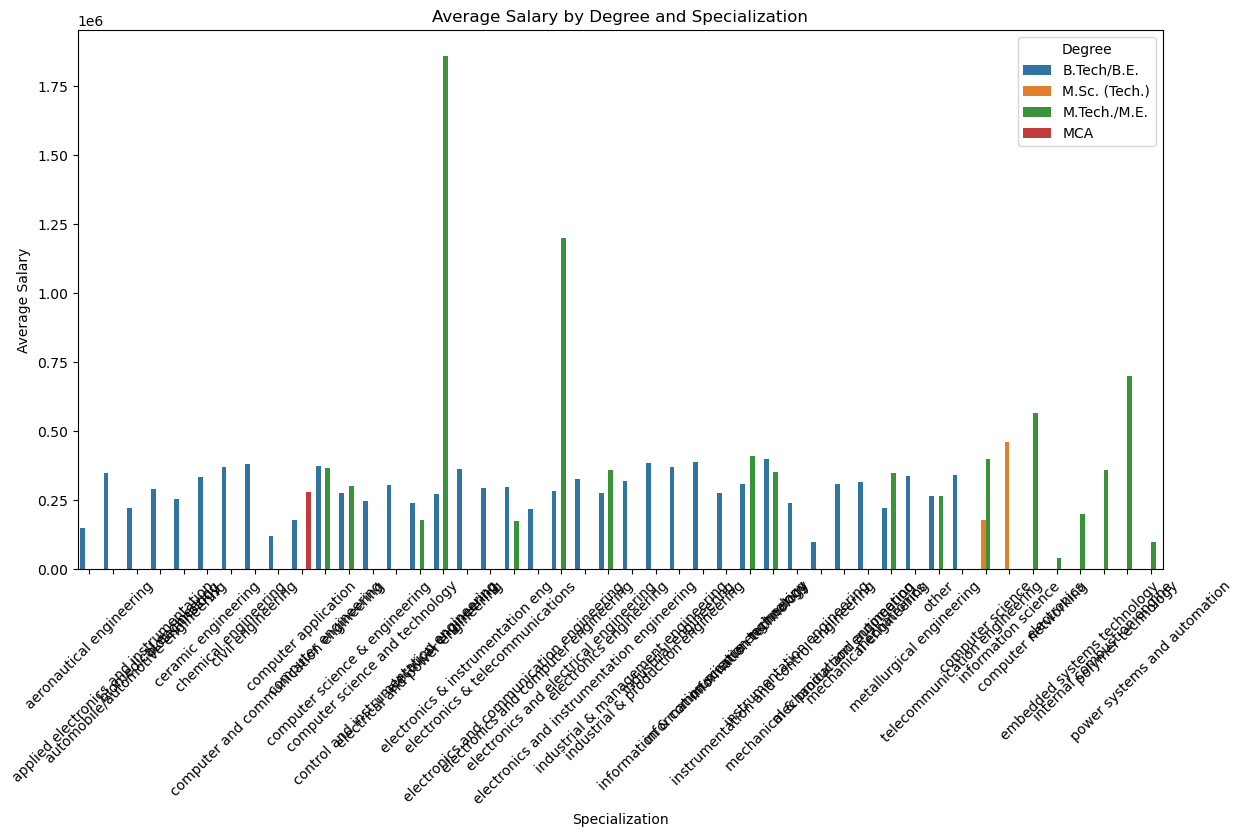

In [63]:


# Step 2: Data Cleaning
# Check for missing values in Degree, Specialization, and Salary
print(df[['Degree', 'Specialization', 'Salary']].isnull().sum())

# Drop rows with missing values if necessary
df = df.dropna(subset=['Degree', 'Specialization', 'Salary'])

# Convert Salary to numeric
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Step 3: Group by Degree and Specialization to calculate average Salary
salary_stats = df.groupby(['Degree', 'Specialization'])['Salary'].mean().reset_index()

# Step 4: Pivot the data for better visualization
salary_pivot = salary_stats.pivot(index='Degree', columns='Specialization', values='Salary')

# Step 5: Visualization using Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(salary_pivot, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Average Salary'})
plt.title('Average Salary by Degree and Specialization')
plt.ylabel('Degree')
plt.xlabel('Specialization')
plt.show()

# Optional: Visualization using Bar Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=salary_stats, x='Specialization', y='Salary', hue='Degree')
plt.xticks(rotation=45)
plt.title('Average Salary by Degree and Specialization')
plt.ylabel('Average Salary')
plt.xlabel('Specialization')
plt.legend(title='Degree', loc='upper right')
plt.show()


### personality can influence career success

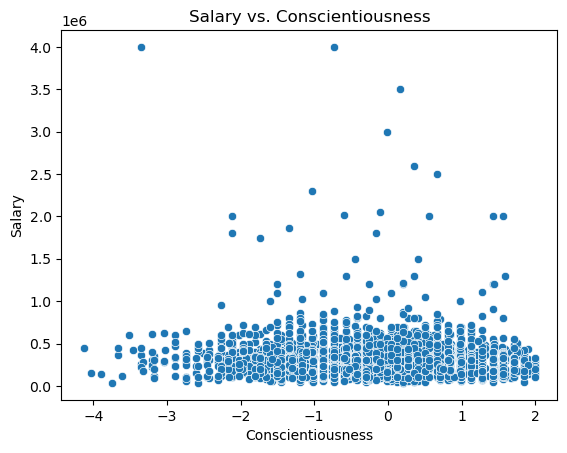

Correlation between conscientiousness and salary: -0.06414849352398534


In [55]:
# Assuming 'conscientiousness' is a column in your DataFrame
sns.scatterplot(x='conscientiousness', y='Salary', data=df)
plt.title('Salary vs. Conscientiousness')
plt.xlabel('Conscientiousness')
plt.ylabel('Salary')
plt.show()

# Calculate correlation
correlation = df['conscientiousness'].corr(df['Salary'])
print(f'Correlation between conscientiousness and salary: {correlation}')


### Job Market Trends: What are the emerging trends in job roles or specializations that have seen salary growth in recent years? how to find show code in singe box

                            Specialization  GraduationYear         Salary
0                 aeronautical engineering            2012  180000.000000
1                 aeronautical engineering            2013  132500.000000
2  applied electronics and instrumentation            2011  675000.000000
3  applied electronics and instrumentation            2013  268333.333333
4  applied electronics and instrumentation            2014  175000.000000


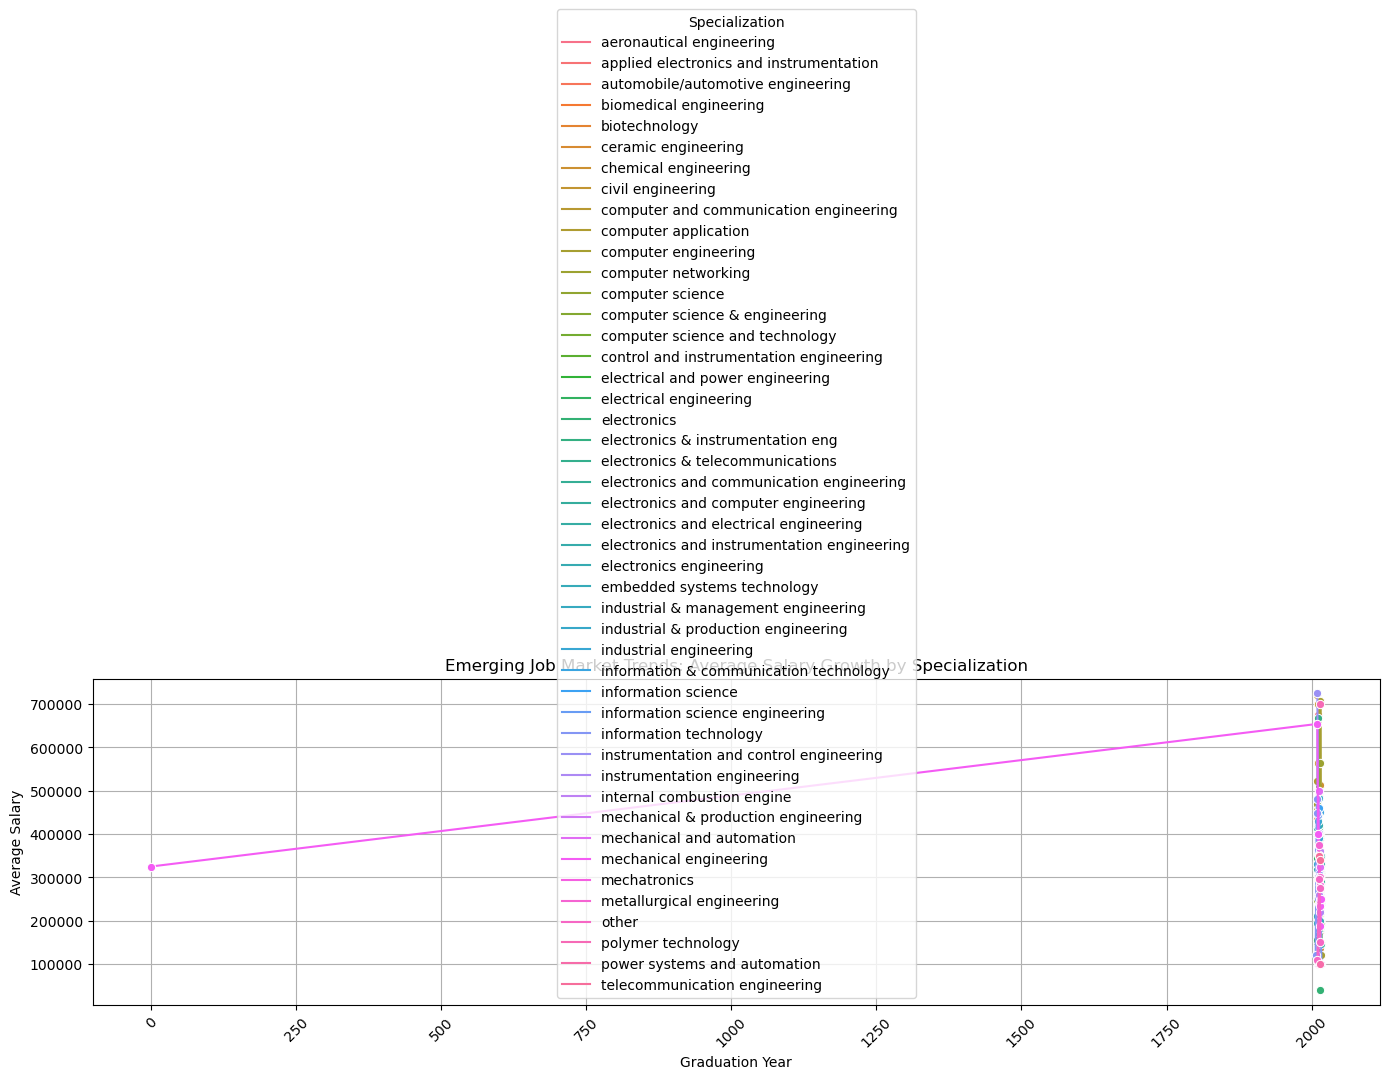

In [58]:
salary_trends = df.groupby(['Specialization', 'GraduationYear'])['Salary'].mean().reset_index()

# Display the resulting DataFrame
print(salary_trends.head())

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot for salary trends by specialization
sns.lineplot(data=salary_trends, x='GraduationYear', y='Salary', hue='Specialization', marker='o')

# Title and labels
plt.title('Emerging Job Market Trends: Average Salary Growth by Specialization')
plt.xlabel('Graduation Year')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend(title='Specialization')
plt.grid(True)
plt.tight_layout()
plt.show()